<a href="https://colab.research.google.com/github/Tamanna1991/neural-networks/blob/main/exploration/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = ... ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Ellipsis
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Ellipsis
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Ellipsis
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Ellipsis
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Ellipsis


In [3]:
#How many samples and features are there?

# YOUR CODE HERE
n_sample = len(df)
n_features = len(df.columns)
print('number of samples:', n_sample, 'number of features:', n_features)
print('number of samples:', ..., 'number of features:', ...)

number of samples: 178 number of features: 14
number of samples: Ellipsis number of features: Ellipsis


In [4]:
# Quiz Q1
# How many instances are there for each class? 
print("class_0 =",len(df[df['y'] == 0]),"class_1 =",len(df[df['y'] == 1]),"class_2 =",len(df[df['y'] == 2]))
# YOUR CODE HERE


class_0 = 0 class_1 = 0 class_2 = 0


In [ ]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.describe()

In [12]:
def mean(alcohol, hue):
    return np.mean(alcohol, hue)



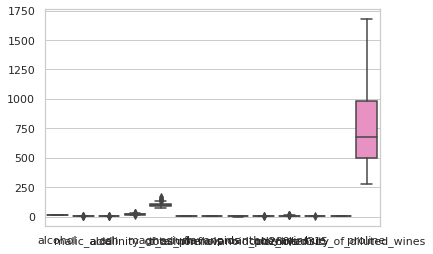

In [6]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?
df_label = df[['y']]
df_features = df.loc[:, df.columns != 'y']
df_features

sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_features)
# YOUR CODE HERE

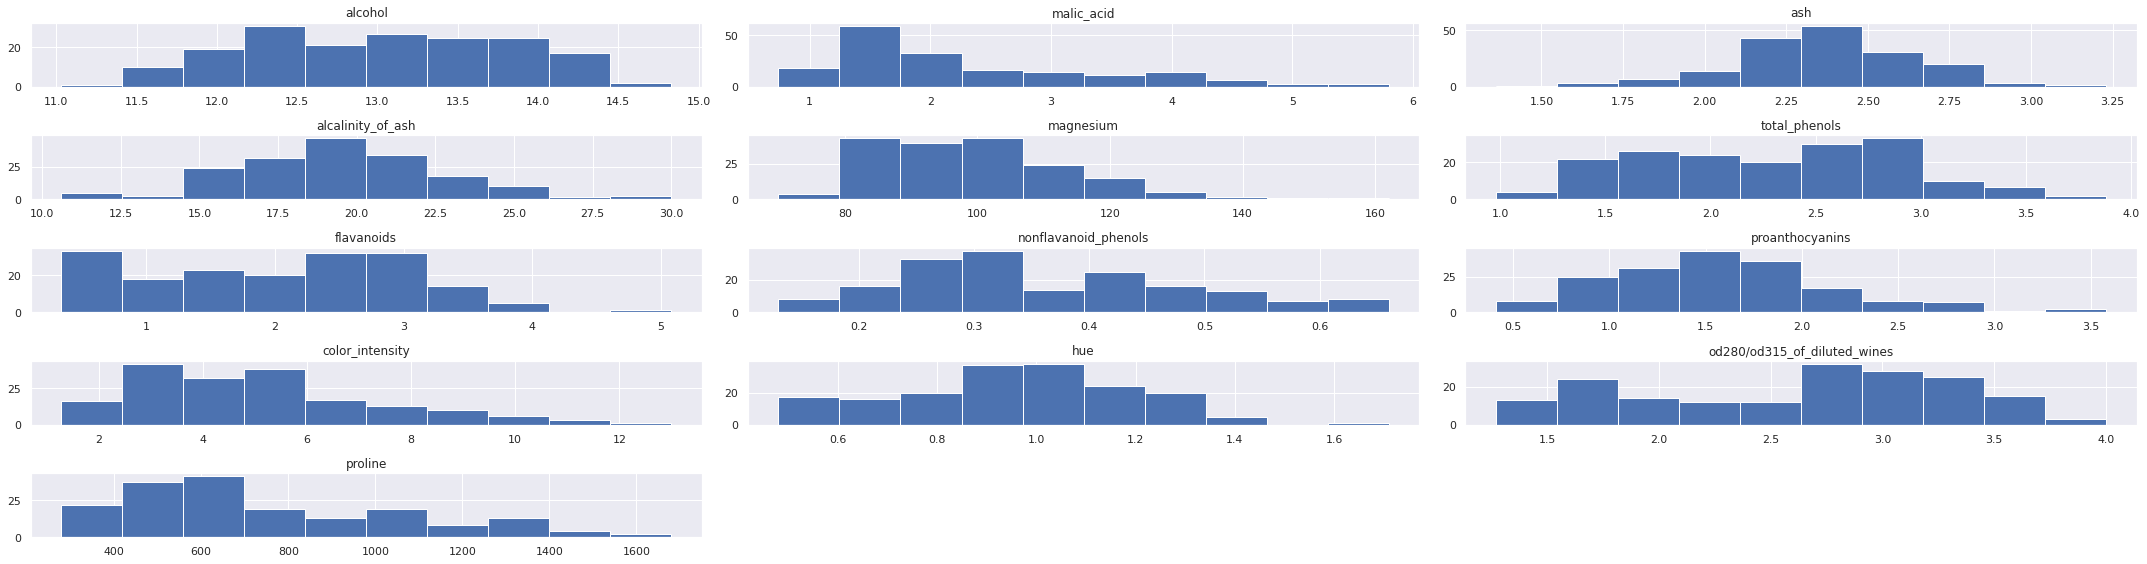

In [7]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
sns.set(rc={'figure.figsize':(30,8)})

plt_figure = plt.figure()

for i, each_feature in enumerate(df_features.columns):
    position = plt_figure.add_subplot(5, 3, i+1)
    df_features[each_feature].hist(bins=10,ax=position)
    position.set_title(each_feature)
plt_figure.tight_layout()
plt.show()
# YOUR CODE HERE

Let's do some multivariate analysis

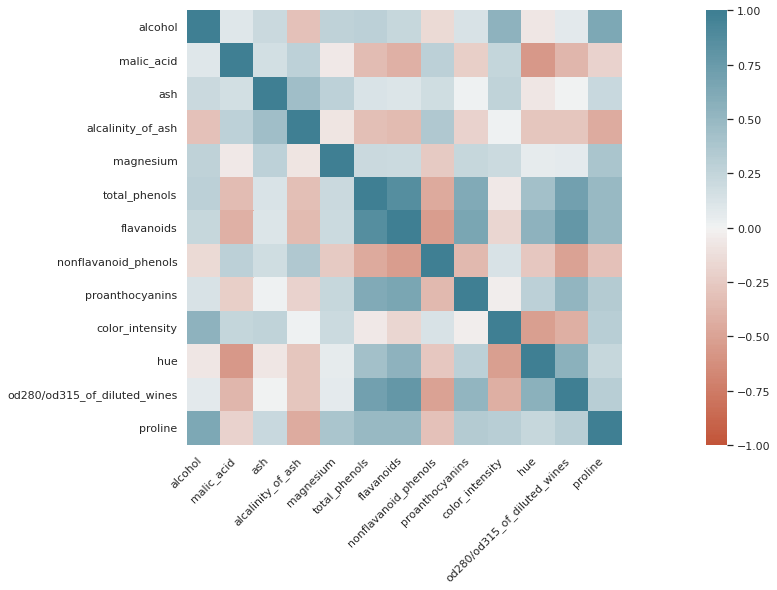

In [8]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
# YOUR CODE HERE
correlation = df_features.corr()

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

# YOUR CODE HERE
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

# YOUR CODE HERE

In [13]:
# What is the highest correlation between features?

print("correlation_max_1",correlation.max(numeric_only=True))
except_corr_one = correlation[correlation != 1.0]
print("correlation_except_max_1",except_corr_one.max(numeric_only=True))
print('the highest correlation between feature is:',except_corr_one['total_phenols']['flavanoids'],except_corr_one['flavanoids']['total_phenols'])


correlation_max_1 alcohol                         1.0
malic_acid                      1.0
ash                             1.0
alcalinity_of_ash               1.0
magnesium                       1.0
total_phenols                   1.0
flavanoids                      1.0
nonflavanoid_phenols            1.0
proanthocyanins                 1.0
color_intensity                 1.0
hue                             1.0
od280/od315_of_diluted_wines    1.0
proline                         1.0
dtype: float64
correlation_except_max_1 alcohol                         0.643720
malic_acid                      0.292977
ash                             0.443367
alcalinity_of_ash               0.443367
magnesium                       0.393351
total_phenols                   0.864564
flavanoids                      0.864564
nonflavanoid_phenols            0.361922
proanthocyanins                 0.652692
color_intensity                 0.546364
hue                             0.565468
od280/od315_of_diluted_

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [14]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

def std_pca(df, var=0.5):
    y_flag = False
    if 'y' in df:
      y = df['y']
      df = df.loc[:, df. columns != 'y']
      y_flag = True
    standard_transformer = StandardScaler()
    df = standard_transformer.fit_transform(df)
    pca = PCA(n_components=var, random_state=100)
    x_pca = pca.fit_transform(df)
    if y_flag:
      x_pca = np.column_stack((x_pca, y))
    return x_pca, pca


# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

df_pca, pca = std_pca(df_features, var=2)# YOUR CODE HERE
# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

pca.explained_variance_ratio_.cumsum()# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE


array([0.36198848, 0.55406338])

In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE


## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!